# Machine Learning 

## Regression techniques

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Inputting the data

In [2]:
X = np.loadtxt('regression_data_x.txt')
Y = np.loadtxt('regression_data_y.txt')

X = np.c_[ np.ones(X[:,1].shape), X ] 

print(X.shape)
print(Y.shape)

(100, 4)
(100,)


Split the data into 80% for training and 20% for testing randomly.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(80, 4)
(20, 4)


## Linear Regression 

Linear regression divides data between classes using multi-dimensional planes. These methods evidently work best on data that is linearly seperable. Linear regression has a closed form solution which makes its computation very efficient. This also guarantees that each run of the algorithm will lead in the optimal solution (the global minimum).

The weights of the linear regression algorithm with l2-norm regression is calculated as

$w = (X^TX + \lambda I)^{-1}(X^TY)$

and the l2-norm is calculated as

$l2norm = \sqrt{\sum_{i=1}^{n} w_i^2}$

Run linear regression on the dataset using different values for the regularization coefficient $ \lambda = {0, 0.1, 1, 10, 100, 1000} $. 

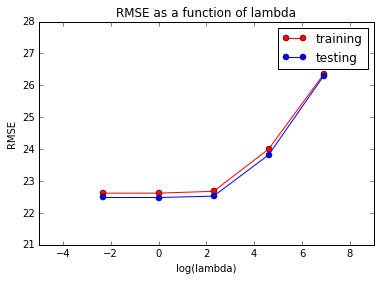

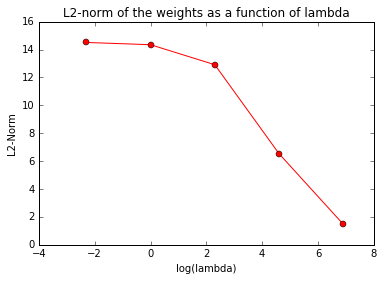

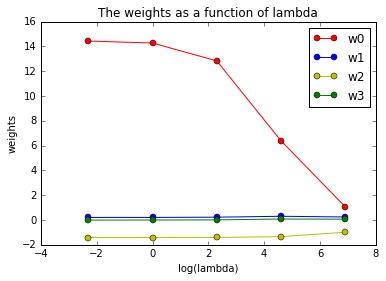

In [9]:
def getRMSError(x, y, weights):
    error = ( np.sum(np.square(np.dot(x, weights) - y)) ) * 1/x[:,1].shape
    return np.sqrt(error)

def L2Norm(weights):
    L2 = np.sqrt(np.sum(np.square(weights)))
    return L2

index = 0

error_train = np.zeros((6,1))
error_test = np.zeros((6,1))
weights = np.zeros((6,4))
norm_weights = np.zeros((6,1))

for lmbda in [0, 0.1, 1, 10, 100, 1000]:    
    weights[index] = np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train) + lmbda * np.identity(4)), \
               np.dot(np.transpose(X_train), y_train))
    
    norm_weights[index] = L2Norm(weights[index,:])
    
    error_train[index] = getRMSError(X_train, y_train, weights[index,:])
    error_test[index] = getRMSError(X_test, y_test, weights[index,:])
    
    index = index + 1


plt.figure()
line1, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000]), (error_train), 'ro-', label="training")
line2, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000]), (error_test), 'ro-', color = 'b', label="testing")
plt.axis([-5, 9, 21, 28])
plt.title('RMSE as a function of lambda')
plt.ylabel('RMSE')
plt.xlabel('log(lambda)')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.figure()
plt.plot(np.log([0, 0.1, 1, 10, 100, 1000]), (norm_weights), 'ro-')
plt.title('L2-norm of the weights as a function of lambda')
plt.ylabel('L2-Norm')
plt.xlabel('log(lambda)')

plt.figure()
line1, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000]), weights[:,0], 'ro-', label="w0")
line2, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000]), weights[:,1], 'ro-', color='b', label="w1")
line3, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000]), weights[:,2], 'ro-', color = 'y', label="w2")
line4, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000]), weights[:,3], 'ro-', color = 'g', label="w3")
plt.title('The weights as a function of lambda')
plt.ylabel('weights')
plt.xlabel('log(lambda)')
first_legend = plt.legend(handles=[line1, line2, line3, line4], loc=1)



In the graph showing the RMSE of the training and testing set while varying the value of $\lambda$ it is noticed that the error increases rapidly as the regularization coefficient gets larger. This causes larger weights to infer more penalty. For an example with only 3 features penalizing weights can cause the data to be misrepresented when over-penalized. The weights calculated through regularization for very large $\lambda$ will tend to zero and therefore will not represent the data. 

This is seen in the second graph where the norm of the weights vector is shown to be going towards 0 as $\lambda$ increase. 

Again, it is also seen in the graph that shows the result of the different weights as $\lambda$ increases. The larger weights tend to zero much faster than the smaller weights due to the squared term in the regularization equation.

## Transforming the dataset

Data can often be transformed in order to attain a linearly seperable set. We apply a Gausian basis functions with 10 distinct means and values of $\sigma={0.1, 0.5, 1, 5, 10}$ to the dataset.

In [10]:
import copy

def GaussianBasis(X, sigma):
    X_basis = np.ones((X[:,1].size, 1))
    
    for i in range(1, X[1,:].size ):
        for j in np.linspace(-10,10,10):

            new_col = np.exp(-1* np.divide(np.square(X[:,i]-(j)) , (2*(sigma**2))))

            X_basis = np.column_stack((X_basis, new_col))
    return X_basis
    
X_train_gauss = GaussianBasis(X_train, 0.1) # 0.1, 0.5, 1, 5 and 10.
X_test_gauss = GaussianBasis(X_test, 0.1)

print(X_train_gauss.shape)
print(X_test_gauss.shape)

(80, 31)
(20, 31)


Linear regression on the Gausian basis transformed dataset.

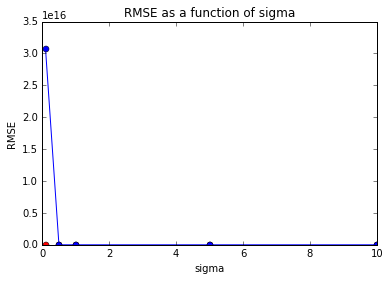

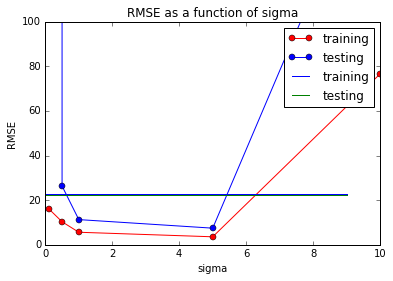

In [11]:
def getRMSError(x, y, weights):
    error = ( np.sum(np.square(np.dot(x, weights) - y)) ) * 1/x[:,1].shape
    return np.sqrt(error)

def L2Norm(weights):
    L2 = np.sqrt(np.sum(np.square(weights)))
    return L2

index = 0

error_basis_train = np.zeros((5,1))
error_basis_test = np.zeros((5,1))
weights_basis = np.zeros((5,31))
norm_basis_weights = np.zeros((5,1))

for sigma in [0.1, 0.5, 1, 5, 10]:    
    X_basis_train = GaussianBasis(X_train, sigma)
    X_basis_test = GaussianBasis(X_test, sigma)
    
    weights_basis[index] = np.dot(np.linalg.inv( np.dot( np.transpose(X_basis_train), X_basis_train)), \
               np.dot(np.transpose(X_basis_train), y_train))
    
    norm_basis_weights[index] = L2Norm(weights_basis[index,:])
    
    error_basis_train[index] = getRMSError(X_basis_train, y_train, weights_basis[index,:])
    error_basis_test[index] = getRMSError(X_basis_test, y_test, weights_basis[index,:])
    
    index = index + 1 

    
plt.figure()
plt.plot([0.1, 0.5, 1, 5, 10], (error_basis_train), 'ro-')
plt.plot([0.1, 0.5, 1, 5, 10], (error_basis_test), 'ro-', color = 'b')
plt.plot(np.arange(10),  error_train[2]*np.ones(10))
plt.plot(np.arange(10),  error_test[2]*np.ones(10))
#plt.axis([-5, 9, 21, 28])
plt.title('RMSE as a function of sigma')
plt.ylabel('RMSE')
plt.xlabel('sigma')

plt.figure()
line1, = plt.plot([0.1, 0.5, 1, 5, 10], (error_basis_train), 'ro-', label="training")
line2, = plt.plot([0.1, 0.5, 1, 5, 10], (error_basis_test), 'ro-', color = 'b', label="testing")
line3, = plt.plot(np.arange(10),  error_train[2]*np.ones(10), label="training")
line4, = plt.plot(np.arange(10),  error_test[2]*np.ones(10), label="testing")
plt.axis([0, 10, 0, 100])
plt.title('RMSE as a function of sigma')
plt.ylabel('RMSE')
plt.xlabel('sigma')
first_legend = plt.legend(handles=[line1, line2, line3, line4], loc=1)

The second graph is a range restricted graph to better show what is happening at smaller values of the RMSE. As is shown in the second graph as $\sigma$ increases the error of both the training and testing set first decreases and then increases. This graph shows that for small values of $\sigma$ there is a large error caused by the large bias, however for very large values of $\sigma$ this also causes very large errors due to the large variance $\sigma$. 

Linear regression with regularization on the Gausian basis transformed features

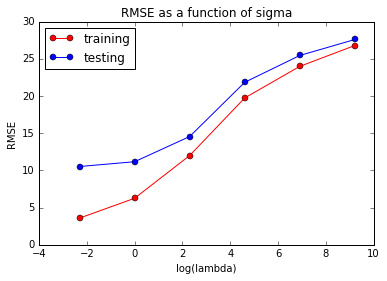

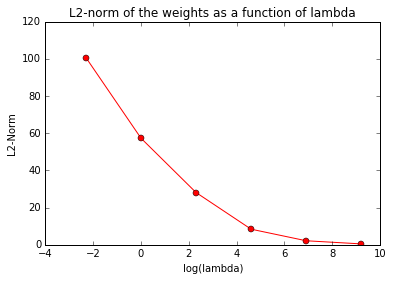

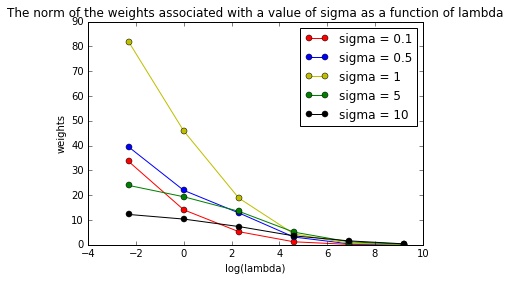

In [12]:
index = 0

error_basis_train_reg = np.zeros((7,1))
error_basis_test_reg = np.zeros((7,1))
weights_basis_reg = np.zeros((7,151))
norm_basis_weights_reg = np.zeros((7,1))

X_basis_train_reg = np.ones((80,1))
X_basis_test_reg = np.ones((20,1))

for sigma in [0.1, 0.5, 1, 5, 10]:    
    new_col_train = GaussianBasis(X_train, sigma)
    new_col_test = GaussianBasis(X_test, sigma)
    
    X_basis_train_reg = np.column_stack((X_basis_train_reg, new_col_train[:, 1:31]))
    X_basis_test_reg = np.column_stack((X_basis_test_reg, new_col_test[:, 1:31]))

    
for lmbda in [0, 0.1, 1, 10, 100, 1000, 10000]: 
    weights_basis_reg[index] = np.dot(np.linalg.pinv(np.dot(np.transpose(X_basis_train_reg), X_basis_train_reg) +  \
               lmbda * np.identity(151)), np.dot(np.transpose(X_basis_train_reg), y_train))
    
    norm_basis_weights_reg[index] = L2Norm(weights_basis_reg[index,:])
    
    error_basis_train_reg[index] = getRMSError(X_basis_train_reg, y_train, weights_basis_reg[index,:])
    error_basis_test_reg[index] = getRMSError(X_basis_test_reg, y_test, weights_basis_reg[index,:])
    
    index = index + 1 

    
plt.figure()
line1, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000, 10000]), (error_basis_train_reg), 'ro-', label="training")
line2, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000, 10000]), (error_basis_test_reg), 'ro-', color = 'b', label="testing")
#plt.axis([-5, 9, 21, 28])
plt.title('RMSE as a function of sigma')
plt.ylabel('RMSE')
plt.xlabel('log(lambda)')
first_legend = plt.legend(handles=[line1, line2], loc=2)

plt.figure()
plt.plot(np.log([0, 0.1, 1, 10, 100, 1000, 10000]), (norm_basis_weights_reg), 'ro-')
plt.title('L2-norm of the weights as a function of lambda')
plt.ylabel('L2-Norm')
plt.xlabel('log(lambda)')

L2normlmbda1 = [L2Norm(weights_basis_reg[0,1:31]), L2Norm(weights_basis_reg[1,1:31]), \
                L2Norm(weights_basis_reg[2,1:31]), L2Norm(weights_basis_reg[3,1:31]), L2Norm(weights_basis_reg[4,1:31]), \
                L2Norm(weights_basis_reg[5,1:31]), L2Norm(weights_basis_reg[6,1:31])] 
L2normlmbda2 = [L2Norm(weights_basis_reg[0,31:61]), L2Norm(weights_basis_reg[1,31:61]), L2Norm(weights_basis_reg[2,31:61]), \
                   L2Norm(weights_basis_reg[3,31:61]), L2Norm(weights_basis_reg[4,31:61]), L2Norm(weights_basis_reg[5,31:61]), \
                   L2Norm(weights_basis_reg[6,31:61])] 
L2normlmbda3 = [L2Norm(weights_basis_reg[0,61:91]), L2Norm(weights_basis_reg[1,61:91]), L2Norm(weights_basis_reg[2,61:91]), \
                   L2Norm(weights_basis_reg[3,61:91]), L2Norm(weights_basis_reg[4,61:91]), L2Norm(weights_basis_reg[5,61:91]), \
                   L2Norm(weights_basis_reg[6,61:91])] 
L2normlmbda4 = [L2Norm(weights_basis_reg[0,91:121]), L2Norm(weights_basis_reg[1,91:121]), \
                L2Norm(weights_basis_reg[2,91:121]), L2Norm(weights_basis_reg[3,91:121]), \
                L2Norm(weights_basis_reg[4,91:121]), L2Norm(weights_basis_reg[5,91:121]), \
                   L2Norm(weights_basis_reg[6,91:121])] 
L2normlmbda5 = [L2Norm(weights_basis_reg[0,121:151]), L2Norm(weights_basis_reg[1,121:151]), \
                    L2Norm(weights_basis_reg[2,121:151]), L2Norm(weights_basis_reg[3,121:151]), \
                    L2Norm(weights_basis_reg[4,121:151]), L2Norm(weights_basis_reg[5,121:151]), \
                    L2Norm(weights_basis_reg[6,121:151])] 

plt.figure()
line1, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000, 10000]), L2normlmbda1, 'ro-', label="sigma = 0.1")
line2, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000, 10000]), L2normlmbda2, 'ro-', color='b', label="sigma = 0.5")
line3, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000, 10000]), L2normlmbda3, 'ro-', color = 'y', label="sigma = 1")
line4, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000, 10000]), L2normlmbda4, 'ro-', color = 'g', label="sigma = 5")
line5, = plt.plot(np.log([0, 0.1, 1, 10, 100, 1000, 10000]), L2normlmbda5, 'ro-', color = 'k', label="sigma = 10")
plt.title('The norm of the weights associated with a value of sigma as a function of lambda')
plt.ylabel('weights')
plt.xlabel('log(lambda)')
first_legend = plt.legend(handles=[line1, line2, line3, line4, line5], loc=1)

In [13]:
print("Training set error:")
print(error_basis_train_reg)
print("\n")
print("Testing set error:")
print(error_basis_test_reg)

Training set error:
[[  2.07452666e-10]
 [  3.58632640e+00]
 [  6.25626425e+00]
 [  1.19990418e+01]
 [  1.97388596e+01]
 [  2.39849918e+01]
 [  2.67867857e+01]]


Testing set error:
[[ 62.34694245]
 [ 10.52280542]
 [ 11.16706006]
 [ 14.55337672]
 [ 21.8440544 ]
 [ 25.44707219]
 [ 27.59476303]]


The RMSE obtained previously without using the Gaussian basis for for $\lambda = 0.1$ was calculated to be $22.62$. The linear regression with regularization now gives an RMSE error of $3.59$. This is significant improvement. It is attributed to a shift in the bias-variance curve as shown in the previous section, by adding some variance to the learner we are able to get closer to the optimal minimum trade-off between the bias-variance graph.

The two other graphs behave in the same way as expected due to the regularization coefficient $\lambda$. A larger regularization coefficient causes the weight vector to tend towards zero as is observed. 

## Augmenting the features through cross terms

To include interaction terms in our feature space we can first introduce some cross terms. For example, new features can be comprised of products of the original features. 

If it is desired to do this using Gaussian basis functions multivariate Gaussian basis functions can be used, where multiple features can be included in the newly added feature. This will allow to give insight to the interaction between the terms. 

However adding to our feature space either by introducing polynomial products of features, or by introducing multivariate Gaussians will cause more variance assuming a constant amount of examples. This is due to the more complexity that the learner will have as more parameters will need to be trained.  

Instead of only minimizing the error in terms of the weights, we will also minimize the error by optimizing for the mean values of the Gaussian basises used. 

The error function with L2 regularization is denoted by $J(w, \mu)$, as it is also a function of $\mu$. 

In the following equations, $m$ denotes the number of examples, $n$ denotes the number of features from the original data and $p$ denote the number of distinct values for $\mu$.

<center>
    $$
        J(w, \mu) = \frac{1}{2} \sum_{i=1}^{m}[\sum_{j=1}^{n} w_j x_{(i,j)} - y_i]^2 + \frac{\lambda}{2}w^Tw
    $$
<center>

<center>
    $$
        J(w, \mu) = \frac{1}{2} \sum_{i=1}^{m}[w_0 + \sum_{j=1}^{n} \sum_{k=1}^{p} w_{(10(j-1)+k)} e^{- \frac{(x_{i,j}-\mu_k)^2}{2\sigma^2}} - y_i]^2 + \frac{\lambda}{2}w^Tw
    $$
<center>
<br>

When taking the derivative in terms of the 10 different means, $\mu_s = \mu_{1...10}$, all the derivatives will be $0$ unless $k=s$. 

<center>
    $$
        \frac{\partial }{\partial \mu_s} J(w, \mu) = \sum_{i=1}^{m}[\sum_{j=1}^{n} w_{(10(j-1)+s)} (x_{i,j} - \mu_s) e^{- \frac{(x_{i,j}-\mu_s)^2}{2\sigma^2}}][w_0 + \sum_{j=1}^{n} \sum_{k=1}^{p} w_{(10(j-1)+k)} e^{- \frac{(x_{i,j}-\mu_k)^2}{2\sigma^2}} - y_i] 
    $$
<center>
<br>

***

The algorithm which will update the placement of the means $\mu$ and the weights $w$.

1. Initialize the mean vector; $\mu$ 
2. Calculate the weights; $w = (\phi ^T \phi + \lambda I)^{-1} \phi ^T y$ 
3. Update the means; $\mu \leftarrow \mu - \alpha \frac{\partial }{\partial \mu_s} J(w, \mu)$
4. Repeat until $||w^{i+1}-w^{i}||_{2} \leq \epsilon$

The proposed algorithm converges to a local minimum. The algorithm updates the values of the means by using gradient descent. This technique follows the error function until it reaches a trough, therefore local minimums exist is more than one through exists in the function. After running the algorithm with random starting values for the means the algorithm converged to different minimum values for the error. Therefore, it can be concluded that the algorithm converges to local minimums. 

The implementation of the algorithm proposed in part (h), using $\sigma = 1$

Number of iterations:
383


Final value of the 10 means used in the Gaussian basis:
[-9.56777433 -8.05926409 -5.10625297 -4.3581899  -1.55958162  1.57545065
  4.38040422  4.99393715  7.80243114  9.63331795]


Root mean squared error of the training set:
[ 5.16286512]


Root mean squared error of the testing set:
[ 10.17708493]




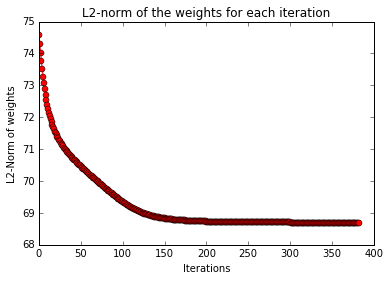

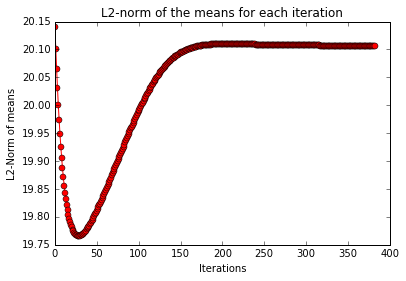

In [14]:
def updateWeights(X, y, lmbda):
    weights = np.dot(np.linalg.inv(np.dot(np.transpose(X), X) + lmbda * np.identity(31)), \
               np.dot(np.transpose(X), y))
    return weights

def updateBasis(X, sigma, means):
    X_basis = np.ones((X[:,1].size, 1))
    for i in range(1, X[1,:].size ):
        for j in means:
            new_col = np.exp(-1* np.divide(np.square(X[:,i]-(j)) , (2*(sigma**2))))
            X_basis = np.column_stack((X_basis, new_col))
    return X_basis

def updateMeans(means, weights, X, X_basis, y, sigma, learning_rate):
    size_m = len(X_basis[:,1])
    size_n = len(X[1,:])
    #print(size_m)
    #print(size_n)
    
    for s in range(1, 11):                # Going through means
        
        sum_across_examples = 0;
        for i in range(0, size_m):       # Going through examples
            
            # First part
            sum_first_part = 0
            for j in range(1, size_n):   # Going through features
                
                sum_first_part = sum_first_part + weights[(10*(j-1)+s)]*(X[i, j]-means[s-1])*X_basis[i,(10*(j-1)+s)]
            
            # Second part
            X_basis_vector = np.transpose(X_basis[i, :])
            sum_second_part = np.dot(X_basis_vector, weights) - y[i]
    
            sum_across_examples = sum_across_examples + sum_first_part * sum_second_part
        means[s-1] = means[s-1] - learning_rate*sum_across_examples
    
    return means


lmbda = 1
sigma = 1
learning_rate = 0.00005

mean = np.linspace(-10,10,10)
temp_weights = 0

norm_weights_alg = np.zeros(10000)
norm_mean_alg = np.zeros(10000)

iterations=0
while(True):
    X_basis = updateBasis(X_train, sigma, mean)
    weights = updateWeights(X_basis, y_train, lmbda)
    norm_weights_alg[iterations] = np.linalg.norm(weights)
    mean = updateMeans(mean, weights, X_train, X_basis, y_train, sigma, learning_rate)
    norm_mean_alg[iterations] = np.linalg.norm(mean)
    
    if (np.abs(np.linalg.norm(weights)-np.linalg.norm(temp_weights))<0.00001 or iterations >1000):
        break
        
    temp_weights = weights;
    iterations = iterations + 1

print("Number of iterations:")
print(iterations)
print("\n")

print("Final value of the 10 means used in the Gaussian basis:")
print(mean)
print("\n")

print("Root mean squared error of the training set:")
print(getRMSError(X_basis, y_train, weights))
print("\n")

X_basis_test = updateBasis(X_test, sigma, mean)
print("Root mean squared error of the testing set:")
print(getRMSError(X_basis_test, y_test, weights))
print("\n")

plt.figure()
plt.plot(range(0,iterations), (norm_weights_alg[0:iterations]), 'ro-')
plt.title('L2-norm of the weights for each iteration')
plt.ylabel('L2-Norm of weights')
plt.xlabel('Iterations')

plt.figure()
plt.plot(range(0,iterations), (norm_mean_alg[0:iterations]), 'ro-')
plt.title('L2-norm of the means for each iteration')
plt.ylabel('L2-Norm of means')
plt.xlabel('Iterations')

The error obtained with the algorithm gave an error of $5.16$ for the training set and $10.177$ for the testing set using a regularization coefficient $\lambda = 1$. Previously when using the means set to be equidistant between $-10$ and $10$ an error of $6.25$ was achieved for the training set and $11.17$ for the testing set. Optimizing the values for the means does result in a better prediction model. 

## Regularization

### Find the maximum likelihood estimate (MLE) of the weights

For a target objective with Gaussian noise 

<center>
    $y_i = h_w(x_i)+ \epsilon_i$
<center>
<br>

Where the variance of the noise $\epsilon$ is defined as and R is a real number. 

<center>
    $$
        \sigma_i = 
        \begin{cases}
        \sigma_0,              & \text{if } ||x_i||_2\leq R\\
        \sigma_1,              & \text{otherwise} 
        \end{cases}
    $$
<center>
<br>

<center>
    $$
        L(w) = \prod_{i=1}^{m} \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} e^{-\frac{1}{2}(y_i-x_i^Tw)^T\Sigma^{-1}(y_i-x_i^Tw)}
    $$
<center>
<br>

<center>
    $$
        log(L(w)) = \sum_{i=1}^{m} log(\frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}) -\frac{1}{2}\sum_{i=1}^{m}(y_i-x_i^Tw)^T\Sigma^{-1}(y_i-x_i^Tw)
    $$
<center>
<br>

This is equivalent to minimizing 

<center>
    $(Xw-y)^T\Sigma^-1(Xw-y)$
<center>
<br>

By taking the gradient and setting it to zero to get the minimum. 

<center>
    $$
        \nabla_w (Xw-y)^T\Sigma^-1(Xw-y)
    $$
    <br>
    $$
        \nabla_w (w^TX^T\Sigma^{-1}Xw - y^T\Sigma^{-1}Xw - w^TX^T\Sigma^{-1}y + y^T\Sigma^{-1}y)
    $$
    <br>
    $$
        0 = 2X^T\Sigma^{-1}Xw - 2X^T\Sigma^{-1}y
    $$
<center>
<br>

The closed form solution is thereofre:

<center>
    $$
        \hat{w}_{MLE} = (X^T\Sigma^{-1}X)^{-1} X^T\Sigma^{-1}y
    $$
<center>
<br>

The covariance matrix $\Sigma$ is a diagonal matrix with variance $\sigma_i$ as defined by 


<center>
    $$
        \sigma_i = 
        \begin{cases}
        \sigma_0,              & \text{if } ||x_i||_2\leq R\\
        \sigma_1,              & \text{otherwise} 
        \end{cases}
    $$
<center>
<br>

where $\sigma_0 < \sigma_1$ and $R$ is a real number.

The estimate would change the weights based on the $\Sigma$ that is used. If an observation shows to have a lot of variance then it will be adjusted to have a smaller weight in order to minimize the importance it will have on the regression.  

The weights will depend on the norm of the features for that example. The weights are calculated using the inverse of $\Sigma$. Thus, the examples that have a smaller norm will have weights multiplied by a larger factor which is defined by $\frac{1}{\sigma_0}$, this will thus result in a larger weight than would otherwise have been calculated if all the values for $\sigma$ were the same. Conversely, the examples that have a norm larger than interger $R$ will have smaller weights due to a larger assigned variance. 

The maximum likelihood estimate of the weights $w$ will be the same as the ones derived above. 

The closed form solution is:

<center>
    $$
        \hat{w}_{MLE} = (X^T\Sigma^{-1}X)^{-1} X^T\Sigma^{-1}y
    $$
<center>
<br>

The covariance matrix $\Sigma$ is a diagonal matrix with variance $\sigma_i$ as defined by 


<center>
    $$
        \sigma_i = c||x_i||_2
    $$
<center>
<br>

where $c$ is a real-valued constant.

## Using other types of error functions

The function $L_H (w, \delta)$ can be graphed to have a quadratic function for small error values and linear for large ones. Precisely, the function is quadratic when an error $|y_i - w^T x_i| \leq \delta$.

<center>
    $$
        L_{h}(w, \delta)=
    \begin{cases}
        \frac{(y_i - w^Tx_i)^2}{2},& \text{if } |y_i - w^Tx_i|\leq \delta\\
        \delta |y_i - w^Tx_i| - \delta ^2 /2,              & \text{otherwise} 
    \end{cases}
    $$
<center>
<br>

This is the cost function of that will be used as $J_D (w)$ in the equation for $J(w)$ with inclusion of the L2 regularization term. 

<center>
    $$
        J(w) = J_D(w) + \lambda J_{PEN} (w)
    $$
<center>
<br>

<center>
    $$
        J(w) = \sum_{i=1}^{m}L_{h_{i}}(w, \delta) + \frac{\lambda}{2} w^T w
    $$
<center>
<br>

Taking the derivative of this error function with respect to the weights. 

<center>
    $$
        \frac{\partial }{\partial w} J(w) = 
        \begin{cases}
        (y_i - w^Tx_i)(-x_i) + \lambda w,& \text{if } |y_i - w^Tx_i|\leq \delta\\
        \delta |x_i| + \lambda w,              & \text{otherwise} 
        \end{cases}
    $$
<center>
<br>

The boundary between the quadratic and linear function which is where $ - \delta \leq y_i - w^T x_i \leq \delta$ needs to be continuous for its derivative. Let $z = y_i - w^T x_i$ which is $z = \delta$ at the boundary between the quadratic and linear parts of $L_H(w,\delta)$. 

For $z \geq 0$ and the linear case:

<center>
    $$
        \delta (y_i - w^T x_i) \geq 0 
    $$
    <br>
    $$
        \frac{\partial }{\partial w}\delta(y_i - w^T x_i) = \delta(-x_i) 
    $$
<center>
<br>

For $z \geq 0$ and the quadratic case:

<center>
    $$
        \frac{(y_i - w^T x_i)^2}{2}
    $$
    <br>
    $$
        \frac{\partial }{\partial w}\frac{(y_i - w^T x_i)^2}{2} = (y_i - w^T x_i)(-x_i) = \delta(-x_i) 
    $$
<center>
<br>

For $z \leq 0$ and the linear case:

<center>
    $$
        \delta (y_i - w^T x_i) \leq 0 
    $$
    <br>
    $$
        \frac{\partial }{\partial w} - \delta (y_i - w^T x_i) = \delta(x_i) 
    $$
<center>
<br>

For $z \leq 0$ and the quadratic case:

<center>
    $$
        \frac{(y_i - w^T x_i)^2}{2}
    $$
    <br>
    $$
        \frac{\partial }{\partial w}\frac{(y_i - w^T x_i)^2}{2} = -(y_i - w^T x_i)(-x_i) = \delta(x_i) 
    $$
<center>
<br>

It is thus confirmed that at the boundaries for both cases of $ - \delta \leq y_i - w^T x_i \leq \delta$ the derivatives are continuous. 

An algorithm to perform linear regression with L2 regularization can updates the weights as follows. 


<center>
    $$
        w \leftarrow w - \alpha \sum_{i=1}^{m}
        \begin{cases}
        (y_i - w^Tx_i)(-x_i) + \lambda w,& \text{if } |y_i - w^Tx_i|\leq \delta\\
        \delta |x_i| + \lambda w,              & \text{otherwise} 
        \end{cases}
    $$
<center>
<br>


If the error of the prediction is too large such that $|y_i - w^T x_i| \leq \delta$ then the penalty will always be the threshold $\delta$. The usual squared loss will have an error function that always attributes an error proportional to the input, however for the huberized loss function after a threshold $\delta$ the penalty for an error is capped to a constant value. This is useful for data sets where there a lot of outliers. 

In this case, the usual squared loss will cause outliers to greatly affect the total error and will cause the weights to be updated by a larger amount unecessarily since these examples do not represent the real distribution. By setting the cap as is the case in the huberized loss outliers will only be able to affect the error by a factor of $\delta$.